In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fdir = '/Users/cosmology/radiometer/ReadoutApp/observation/'

In [3]:
import glob

In [4]:
fnames = glob.glob(fdir+'*.txt')

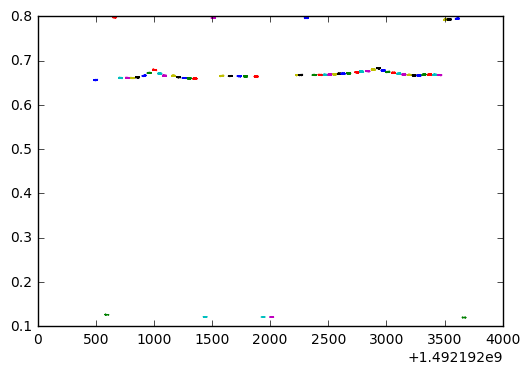

In [5]:
for f in fnames[:-18]:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [6]:
fnames13v = fnames[-18:]
fnames = fnames[:-18]

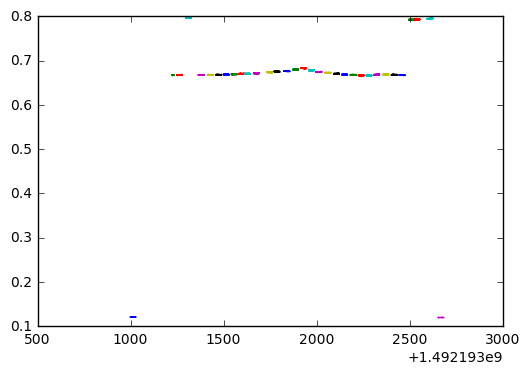

In [14]:
for f in fnames[25:]:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [15]:
newfiles = fnames[25:]

In [16]:
nitrofiles = []
datafiles = []
paddlefiles = []
for f in newfiles:
    x = np.loadtxt(f)
    avg = np.mean(x[:,1])
    if avg < 0.2:
        paddlefiles.append(f)
    elif avg < 0.73:
        datafiles.append(f)
    else:
        nitrofiles.append(f)

In [17]:
nitrofiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:24:55_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:44:54_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:45:24_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:46:34_Readout.txt']

In [18]:
paddlefiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:19:57_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:47:32_Readout.txt']

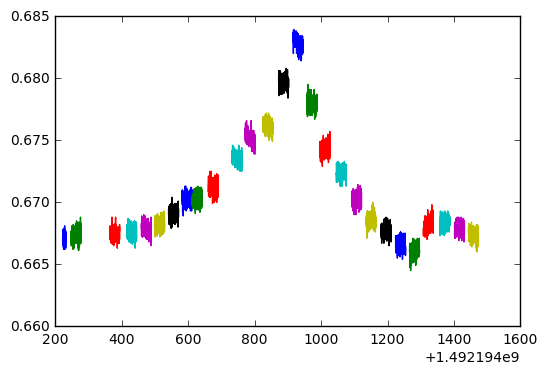

In [19]:
for f in datafiles:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [21]:
angles = np.array([0, 0, 5, 10, 15, 20, 25, 30, 30, 35, 40, 45, 50, 55, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0])

In [20]:
for f in datafiles:
    fl = open(f)
    for k in range(8):
        fl.readline()
        if k == 2:
            print fl.readline()

# Angle pointing (from vertical): 0

# Angle pointing (from vertical): 0

# Angle pointing (from vertical): 5

# Angle pointing (from vertical): 10

# Angle pointing (from vertical): 15

# Angle pointing (from vertical): 20

# Angle pointing (from vertical): 25

# Angle pointing (from vertical): 30

# Angle pointing (from vertical): 30

# Angle pointing (from vertical): 35

# Angle pointing (from vertical): 40

# Angle pointing (from vertical): 45

# Angle pointing (from vertical): 50

# Angle pointing (from vertical): 55

# Angle pointing (from vertical): 60

# Angle pointing (from vertical): 55

# Angle pointing (from vertical): 50

# Angle pointing (from vertical): 45

# Angle pointing (from vertical): 40

# Angle pointing (from vertical): 35

# Angle pointing (from vertical): 30

# Angle pointing (from vertical): 25

# Angle pointing (from vertical): 20

# Angle pointing (from vertical): 15

# Angle pointing (from vertical): 10

# Angle pointing (from vertical): 5

# Angle pointing

In [34]:
angles = np.arange(7) * 10
angles2 = np.arange(5) * 10

In [42]:
angles2 = np.concatenate([angles2, np.ones(1)*50])

In [46]:
angles2[6::-1]

array([ 50.,  40.,  40.,  30.,  20.,  10.,   0.])

In [47]:
angles

array([ 0, 10, 20, 30, 40, 50, 60])

In [48]:
angles = np.concatenate([angles, angles2[6::-1]])

In [49]:
angles

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  50.,  40.,  40.,  30.,
        20.,  10.,   0.])

In [22]:
meandatas = []
for f in datafiles:
    x = np.loadtxt(f)
    meandatas.append(np.mean(x[:,1]))

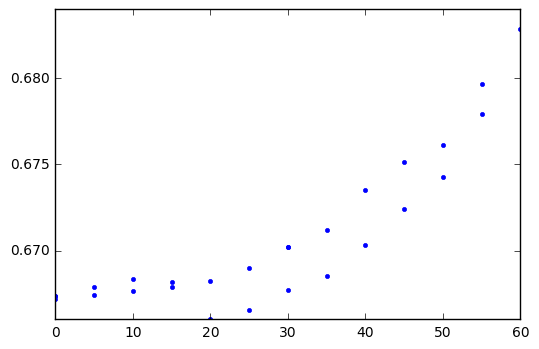

In [23]:
plot(angles, meandatas, '.')

In [24]:
radangles = angles * np.pi / 180.

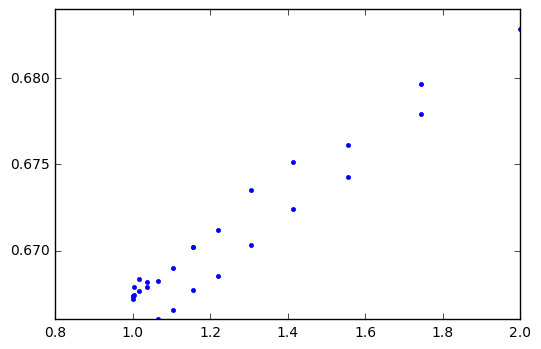

In [25]:
plot(1./np.cos(radangles), meandatas, '.')

In [26]:
def line(x, m, b):
    return m*x + b

In [27]:
from scipy.optimize import curve_fit

In [28]:
x = 1./np.cos(radangles)
y = np.array(meandatas) + 0.0

In [29]:
popt = curve_fit(line, x, y)

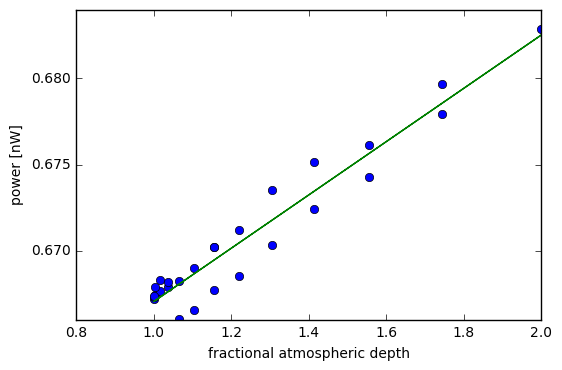

In [30]:
plot(x, y, 'o')
plot(x, line(x, *popt[0]))
xlabel('fractional atmospheric depth')
ylabel('power [nW]')

In [31]:
cmbpower = popt[0][1]

In [32]:
print cmbpower #nanoWatts

0.651572691458


In [63]:
xp = np.concatenate([np.zeros(1), x])

In [64]:
xp

array([ 0.        ,  1.        ,  1.01542661,  1.06417777,  1.15470054,
        1.30540729,  1.55572383,  2.        ,  1.55572383,  1.30540729,
        1.30540729,  1.15470054,  1.06417777,  1.01542661,  1.        ])

In [33]:
paddlefiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:19:57_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:47:32_Readout.txt']

In [34]:
nitrofiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:24:55_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:44:54_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:45:24_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:46:34_Readout.txt']

In [35]:
nitropower = []
for f in nitrofiles:
    x = np.loadtxt(f)
    nitropower.append(np.mean(x[:,1]))

In [36]:
nitropower

[0.79604290540540534,
 0.79214020270270269,
 0.79250101351351354,
 0.79446700336700338]

In [37]:
paddlepower = []
paddletemps = []
for f in paddlefiles:
    x = np.loadtxt(f)
    paddlepower.append(np.mean(x[:,1])*10)
    paddletemps.append(np.mean(x[:,2]))

In [38]:
paddlepower

[1.2103108108108107, 1.1978547297297297]

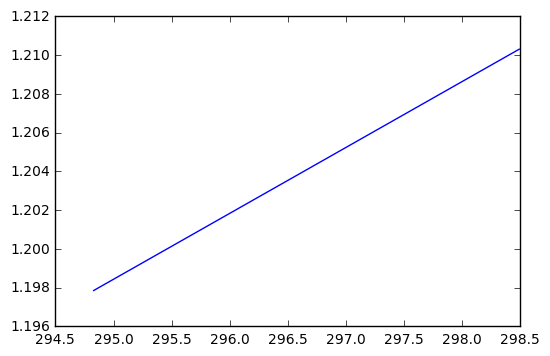

In [39]:
plot(paddletemps, paddlepower)

In [40]:
nitrotemps = [77.2, 77.2, 77.2, 77.2]

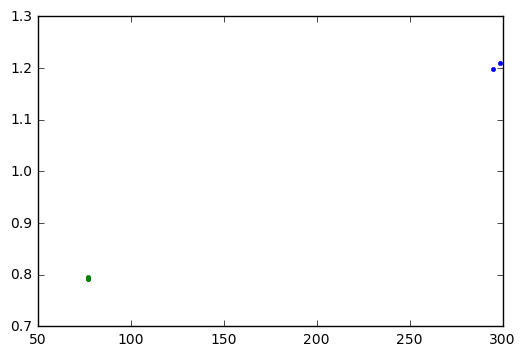

In [41]:
plot(paddletemps, paddlepower, '.')
plot(nitrotemps, nitropower, '.')

In [43]:
xc = np.concatenate([nitrotemps, paddletemps])

In [44]:
yc = np.concatenate([nitropower, paddlepower])

In [45]:
popt2 = curve_fit(line, yc, xc)

In [46]:
popt2

(array([ 534.77508505, -347.28331015]), array([[ 8.17248364, -7.60492738],
        [-7.60492738,  7.38263262]]))

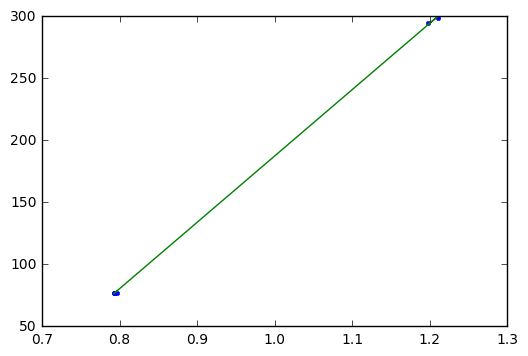

In [47]:
plot(yc, xc, '.')
plot(yc, line(yc, *popt2[0]))

In [48]:
line(cmbpower, *popt2[0])

1.1615313431584013

In [95]:
cmbpower

0.64022612627674247

In [137]:
yc2 = np.concatenate([np.ones(1)*cmbpower, yc])

In [138]:
yc2

array([ 0.77738717,  0.94649764,  0.94231481,  1.42336824,  1.40823986,
        1.42636486])